## C4: Technical Lesson

### Step 1: Generating and Analyzing White Noise

Task: Generate and Analyze White Noise

#### 1.1 Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


#### 1.2 Generate a White Noise Time Series

In [2]:
np.random.seed(12)
dates = pd.date_range("2018-08-01", "2018-10-31", freq="B", inclusive="left")
commute = np.random.normal(25, 4, len(dates))
commute_series = pd.Series(commute, index=dates)

#### 1.3 Visualize the Time Series

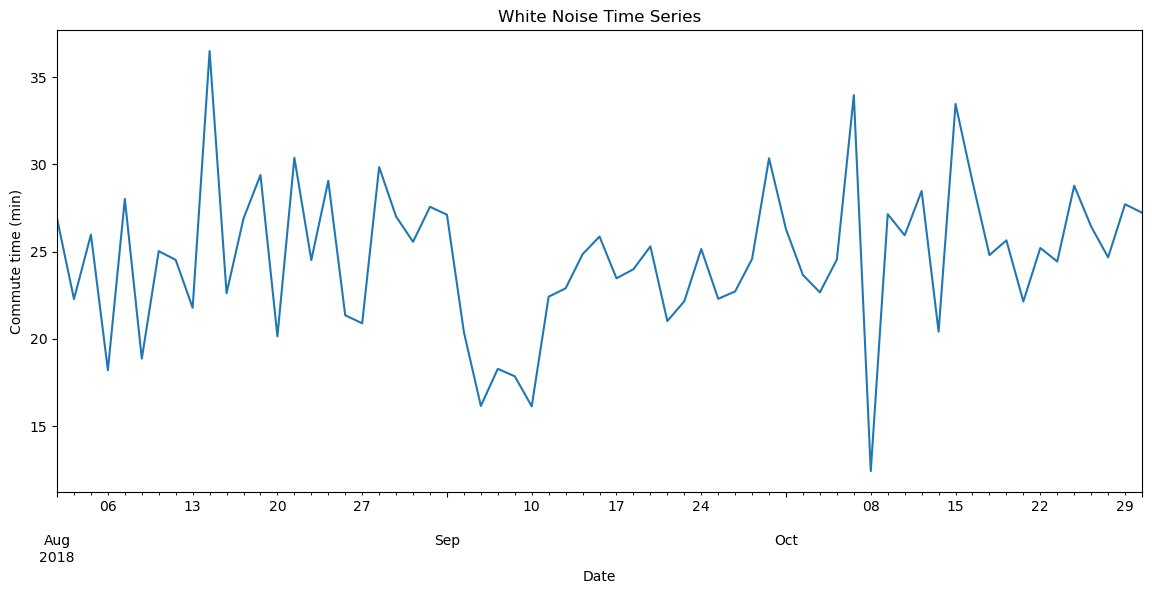

In [3]:
commute_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Commute time (min)")
plt.title("White Noise Time Series")
plt.show()


#### 1.4 Analyze Statistical Properties

In [4]:
print("Mean:", np.mean(commute_series))
print("Standard Deviation:", np.std(commute_series))

Mean: 24.629331839058004
Standard Deviation: 4.2480368492867395


### Step 2: Generating and Analyzing a Random Walk

#### 2.1 Generate a Random Walk Series

In [5]:
np.random.seed(11)
dates = pd.date_range("2010-01-01", "2010-11-30", freq="B", inclusive="left")
error = np.random.normal(0, 10, len(dates))


def random_walk(start, error):
    Y_0 = start
    return np.cumsum(error) + Y_0


shares_value = random_walk(1000, error)
shares_series = pd.Series(shares_value, index=dates)


#### 2.2 Visualize the Random Walk

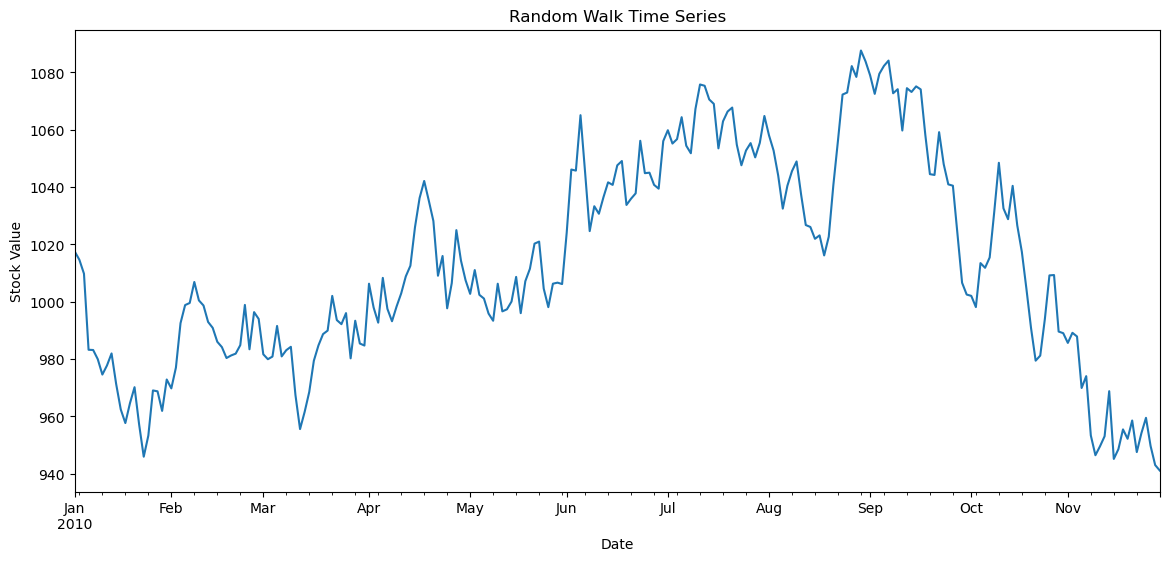

In [6]:
shares_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.title("Random Walk Time Series")
plt.show()


#### 2.3 Convert Random Walk to White Noise Using Differencing

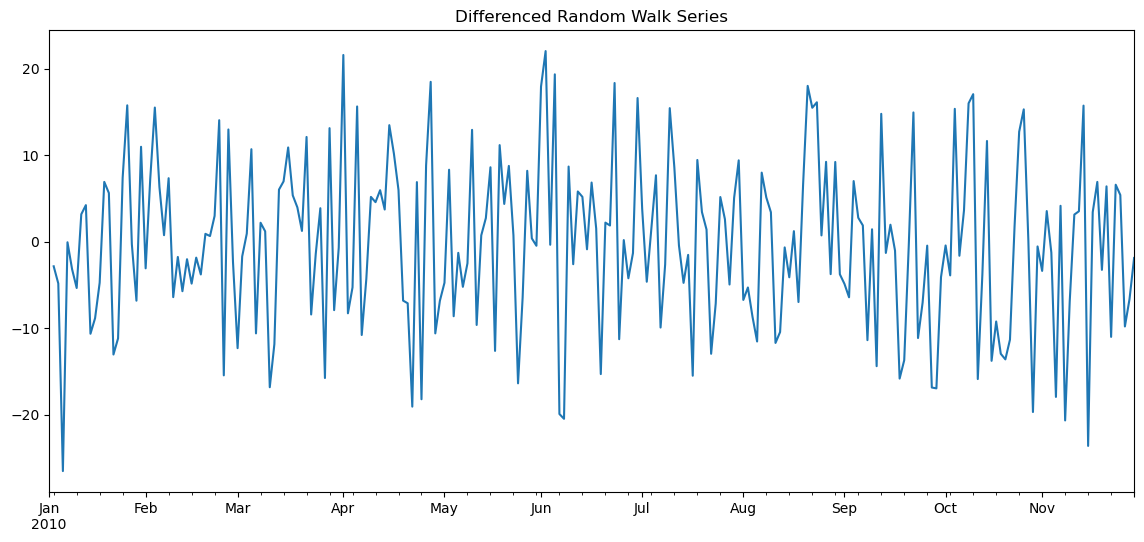

In [7]:
shares_diff = shares_series.diff(periods=1)
shares_diff.plot(figsize=(14, 6))
plt.title("Differenced Random Walk Series")
plt.show()


### Step 3: Understanding Correlation and Autocorrelation

#### 3.1 Load Macroeconomic Time Series Data

In [8]:
data = sm.datasets.macrodata.load_pandas().data


# Convert 'year' and 'quarter' into a datetime format
data["year_quarter"] = pd.to_datetime(data["year"].astype(int).astype(str) + "Q" + data["quarter"].astype(int).astype(str))
data.set_index("year_quarter", inplace=True)


C:\Users\craig\AppData\Local\Temp\ipykernel_69836\2057171986.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["year_quarter"] = pd.to_datetime(data["year"].astype(int).astype(str) + "Q" + data["quarter"].astype(int).astype(str))


#### 3.2 Select and Plot a Time Series Variable (Real GDP)

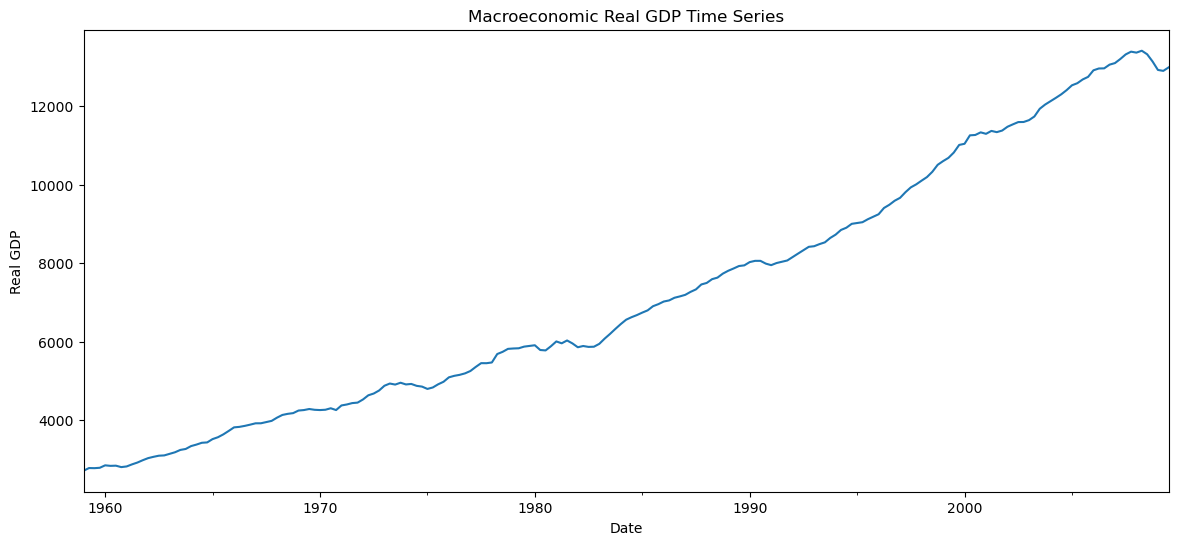

In [9]:
gdp_series = data["realgdp"]
gdp_series.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Real GDP")
plt.title("Macroeconomic Real GDP Time Series")
plt.show()


#### 3.3 Compute Correlation Matrix

In [10]:
print(data[["realgdp", "infl", "unemp"]].corr())

          realgdp      infl     unemp
realgdp  1.000000 -0.191880 -0.064297
infl    -0.191880  1.000000  0.065015
unemp   -0.064297  0.065015  1.000000


#### 3.4 Apply Differencing to Remove Trends in GDP

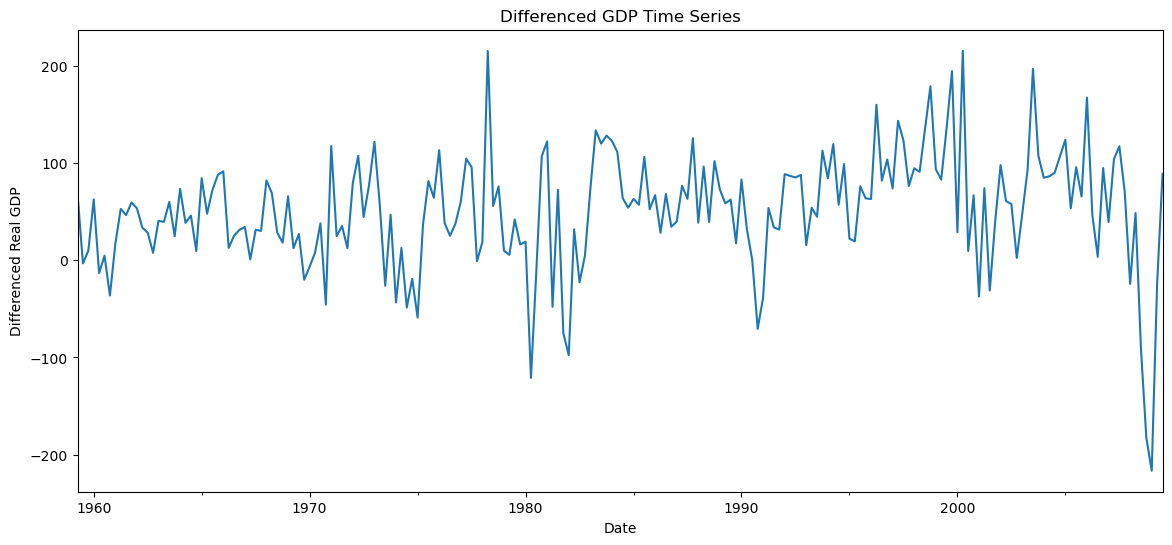

In [11]:
gdp_diff = gdp_series.diff(periods=1).dropna()
gdp_diff.plot(figsize=(14, 6))
plt.xlabel("Date")
plt.ylabel("Differenced Real GDP")
plt.title("Differenced GDP Time Series")
plt.show()


#### 3.5 Plot the Autocorrelation Function (ACF)

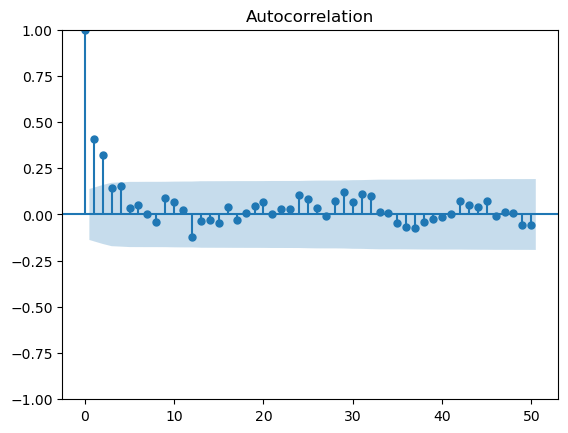

In [12]:
plot_acf(gdp_diff, lags=50)
plt.show()


#### 3.6 Plot the Partial Autocorrelation Function (PACF)

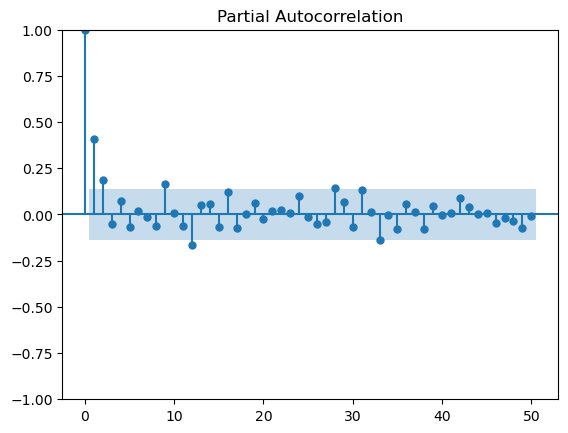

In [13]:
plot_pacf(gdp_diff, lags=50)
plt.show()


### Step 4: Applying AR, MA, and ARMA Models

#### 4.1 Fit an AR(1) Model

In [14]:
model_ar = ARIMA(gdp_diff, order=(1, 0, 0))
results_ar = model_ar.fit()
print(results_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1094.605
Date:                Sun, 07 Dec 2025   AIC                           2195.209
Time:                        08:53:33   BIC                           2205.134
Sample:                    04-01-1959   HQIC                          2199.225
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9287      6.654      7.654      0.000      37.887      63.971
ar.L1          0.4100      0.050      8.253      0.000       0.313       0.507
sigma2      2976.7607    242.486     12.276      0.0

c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


#### 4.2 Fit an MA(1) Model

In [15]:
model_ma = ARIMA(gdp_diff, order=(0, 0, 1))
results_ma = model_ma.fit()
print(results_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1100.979
Date:                Sun, 07 Dec 2025   AIC                           2207.957
Time:                        08:53:37   BIC                           2217.882
Sample:                    04-01-1959   HQIC                          2211.973
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9222      5.234      9.730      0.000      40.665      61.180
ma.L1          0.2818      0.052      5.372      0.000       0.179       0.385
sigma2      3173.1089    243.224     13.046      0.0

c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


#### 4.3 Fit an ARMA(2,1) Model

In [16]:
model_arma = ARIMA(gdp_diff, order=(2, 0, 1))
results_arma = model_arma.fit()
print(results_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                realgdp   No. Observations:                  202
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1090.291
Date:                Sun, 07 Dec 2025   AIC                           2190.582
Time:                        08:53:40   BIC                           2207.124
Sample:                    04-01-1959   HQIC                          2197.275
                         - 07-01-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9291      7.648      6.659      0.000      35.940      65.918
ar.L1         -0.1462      0.262     -0.559      0.576      -0.659       0.367
ar.L2          0.3752      0.098      3.847      0.0

c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\craig\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


#### 4.4 Compare Models Using AIC/BIC

In [17]:
print("AIC:", results_arma.aic, "BIC:", results_arma.bic)

AIC: 2190.5824896456415 BIC: 2207.1238281326478
